In [109]:
import math
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import chain
import seaborn as sns
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding, TSNE
import os
from scipy import misc
import pandas as pd
from numpy import nan
import matplotlib.image as mpimg


In [81]:
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0, spread=0.1):
    dist = start + 0.0
    x = []
    y = []
    while dist * math.hypot(math.cos(angle), math.sin(angle)) < radius:
        x.append(dist * math.cos(angle) + random.uniform(-1, 1) * spread)
        y.append(dist * math.sin(angle) + random.uniform(-1, 1) * spread)
        dist += step
        angle += resolution
    plt.clf()
    colors = x
    plt.scatter(x, y) 
    pic_title = "spiral={0:.2f}.png".format(resolution)
    plt.title(pic_title)
    plt.savefig(pic_title)
    return [x, y]

In [82]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

In [84]:
def half_moon_spiral(resolution=0.1, radius=1, spiral_density=.1):
    angle = 0.0;
    x = []
    y = []
    z = []
    while angle <= math.pi:
        pos_x = math.cos(angle) * radius
        pos_z = math.sin(angle) * radius
        sp = spiral(10, step=0.05, resolution=spiral_density, spread=.5)
        for i in range(len(sp[0])):
            x_pos = sp[0][i] + pos_x
            y_pos = sp[1][i]
            z_pos = pos_z
            x.append(x_pos)
            y.append(y_pos)
            z.append(z_pos)
        angle += resolution

    return [x, y, z]

In [103]:
def draw_mds(matrix, spiral_density, layer_distance, colors):
    embedding = MDS(n_components=2, max_iter=100)
    mds = embedding.fit_transform(matrix)
    plt.clf()
    plt.scatter(mds[:, 0], mds[:, 1], c=colors, cmap=plt.cm.Spectral)
    pic_title = "mds_spiral_density={0:.2f}_layer_distance={1:.2f}.png".format(spiral_density, layer_distance)
    plt.title(pic_title)
    plt.savefig(pic_title)
    plt.show()


def draw_iso_map(matrix, spiral_density, layer_distance, k, colors):
    embedding = Isomap(n_components=2, n_neighbors=k)
    iso_map = embedding.fit_transform(matrix)
    plt.clf()
    plt.scatter(iso_map[:, 0], iso_map[:, 1], c=colors, cmap=plt.cm.Spectral)
    pic_title = "iso_map_spiral_density={0:.2f}_layer_distance={1:.2f}_k={2:.2f}.png".format(spiral_density, layer_distance,
                                                                                         k)
    plt.title(pic_title)
    plt.savefig(pic_title)
    plt.show()


def draw_lle(matrix, spiral_density, layer_distance, k, colors):
    embedding = LocallyLinearEmbedding(n_neighbors=k, n_components=2)
    lle = embedding.fit_transform(matrix)
    plt.clf()
    plt.scatter(lle[:, 0], lle[:, 1], c=colors, cmap=plt.cm.Spectral)
    pic_title = "lle_spiral_density={0:.2f}_layer_distance={1:.2f}_k={2:.2f}.png".format(spiral_density, layer_distance, k)
    plt.title(pic_title)
    plt.savefig(pic_title)
    plt.show()


<Figure size 432x288 with 0 Axes>

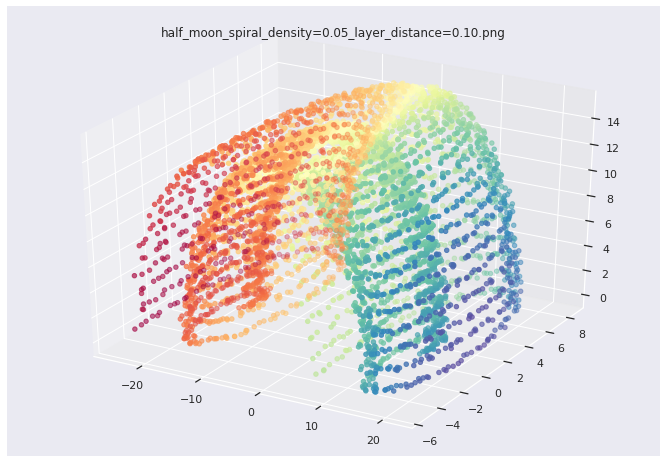

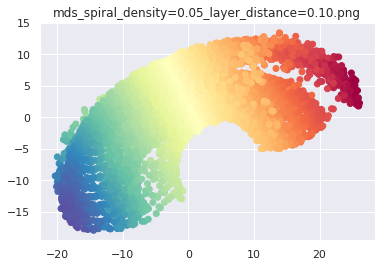

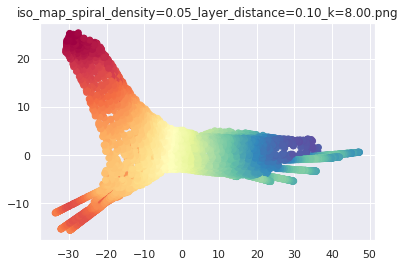

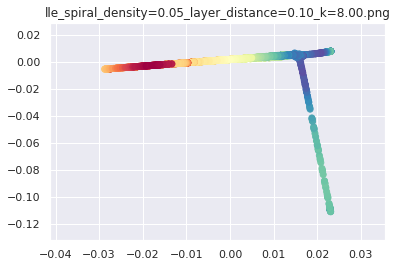

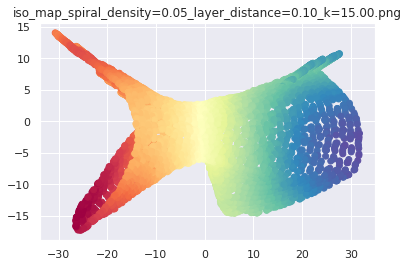

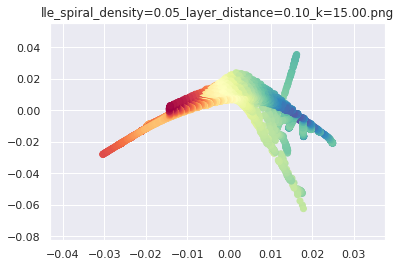

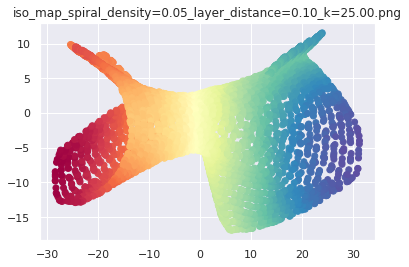

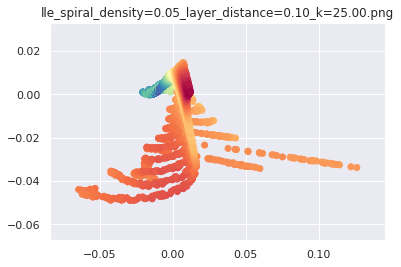

<Figure size 432x288 with 0 Axes>

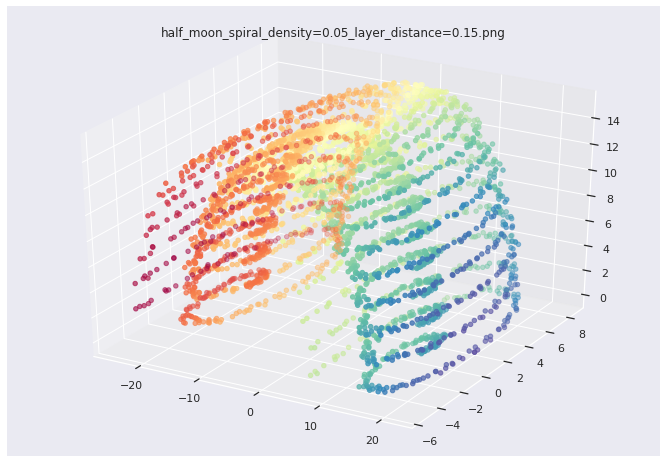

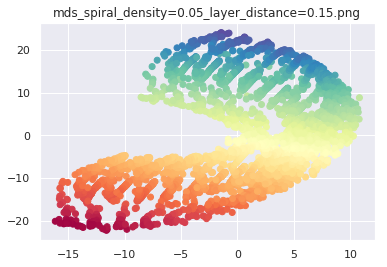

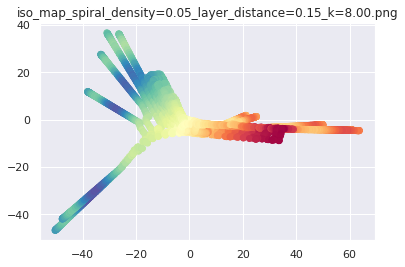

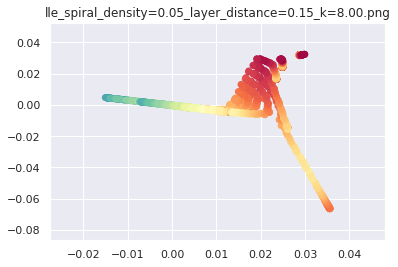

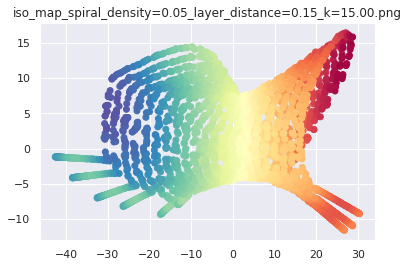

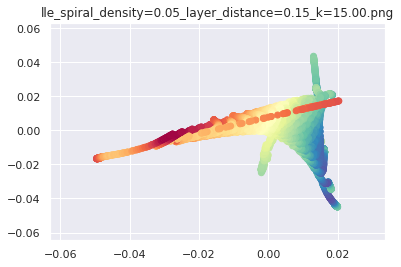

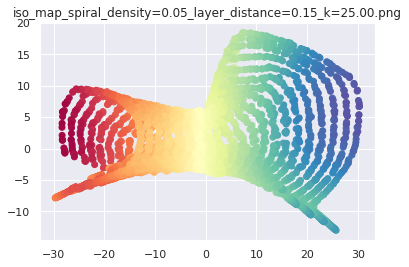

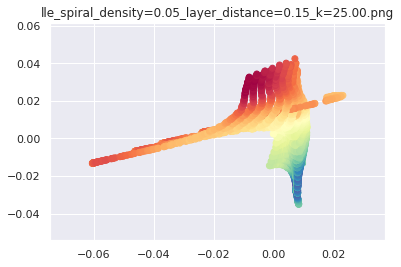

<Figure size 432x288 with 0 Axes>

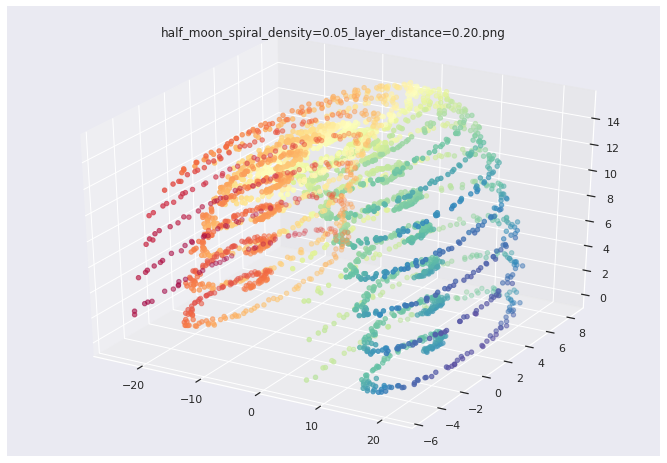

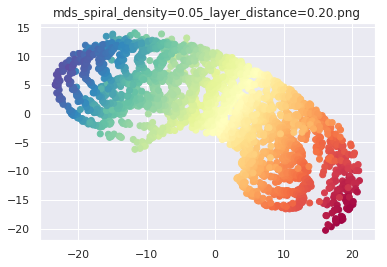

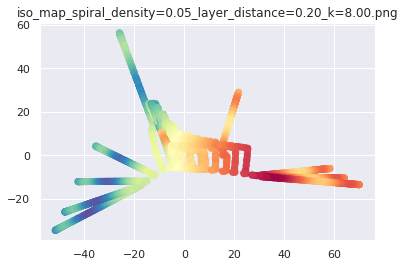

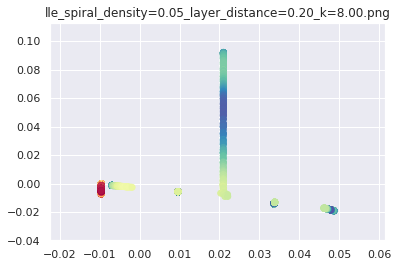

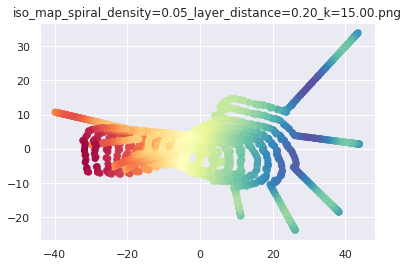

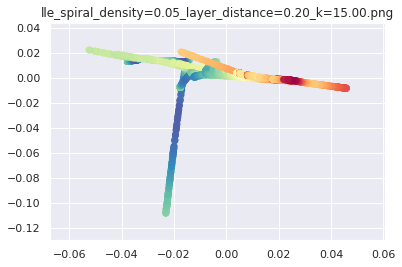

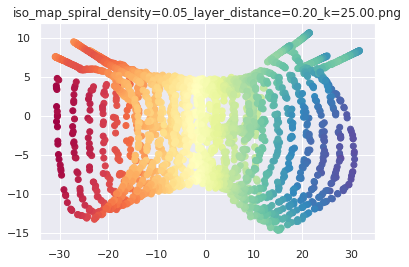

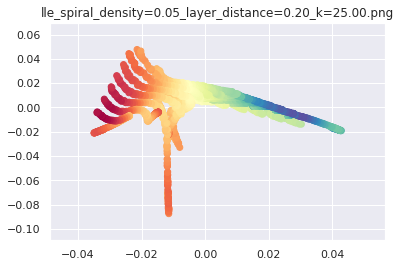

<Figure size 432x288 with 0 Axes>

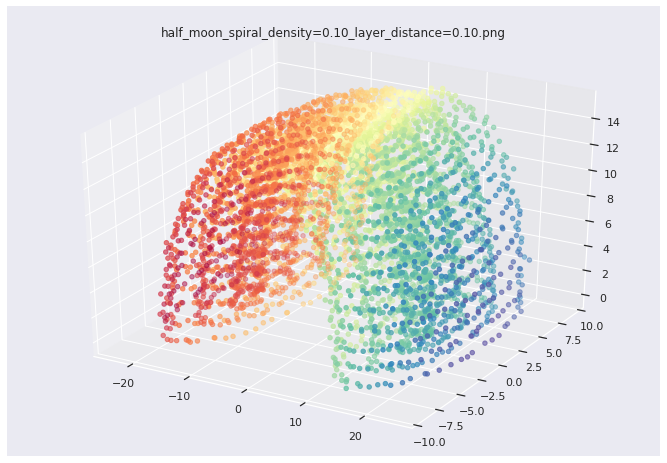

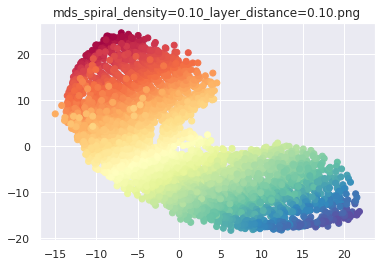

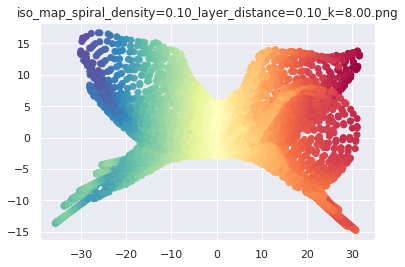

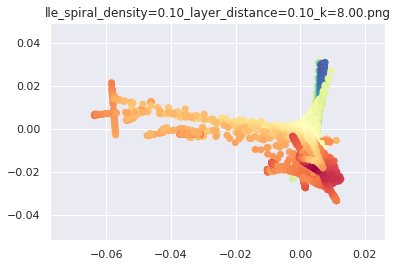

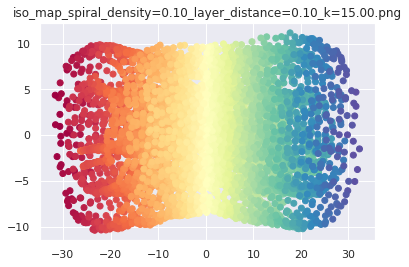

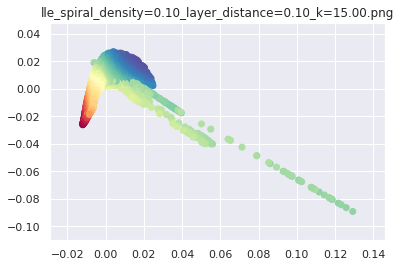

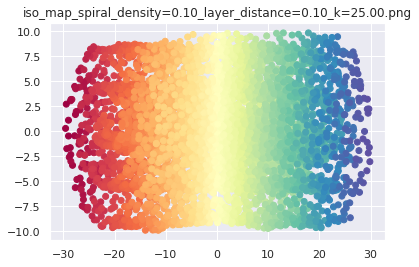

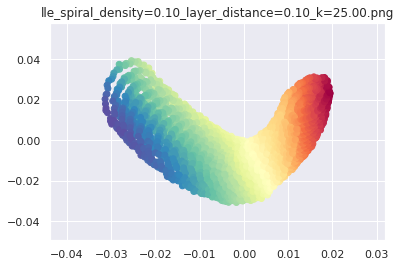

<Figure size 432x288 with 0 Axes>

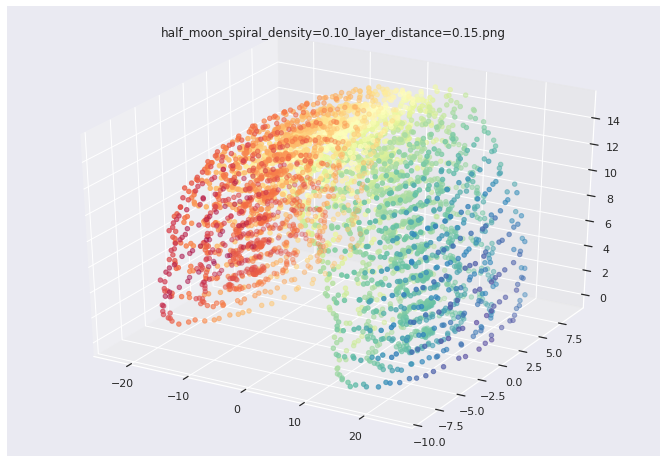

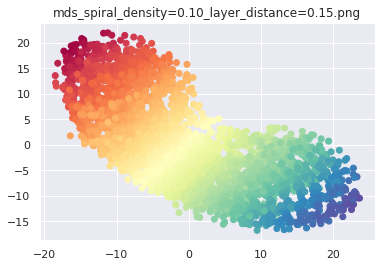

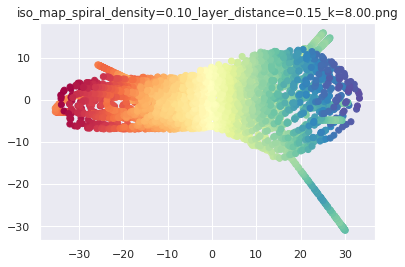

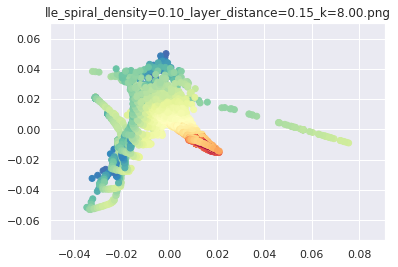

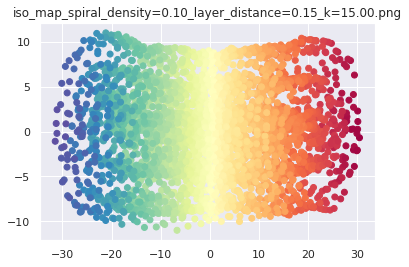

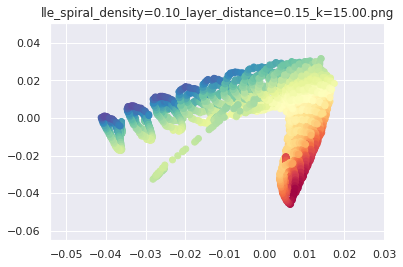

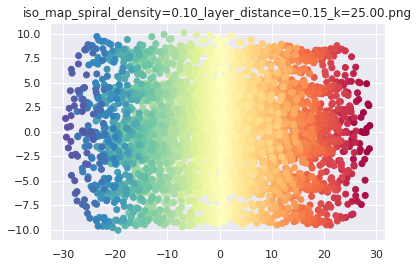

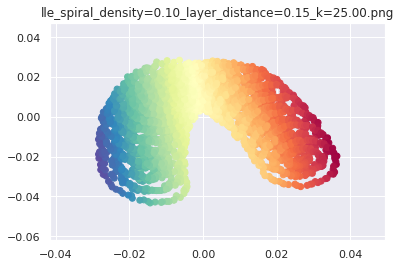

<Figure size 432x288 with 0 Axes>

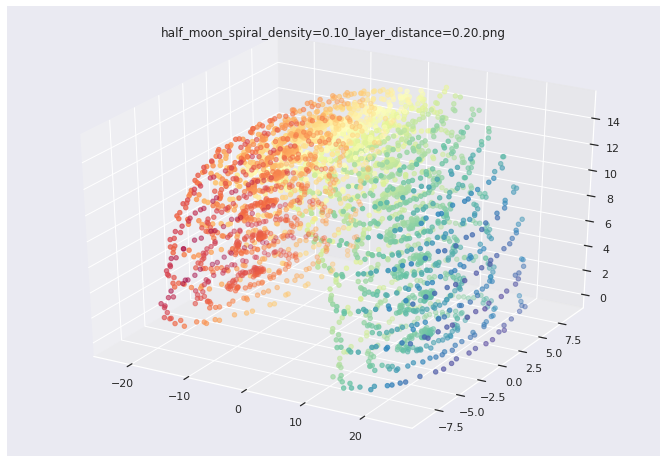

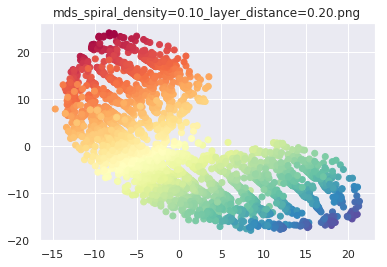

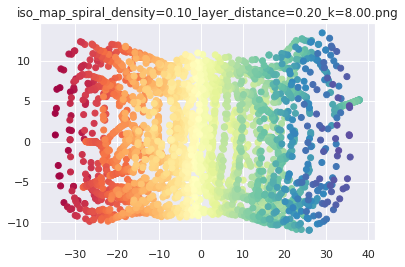

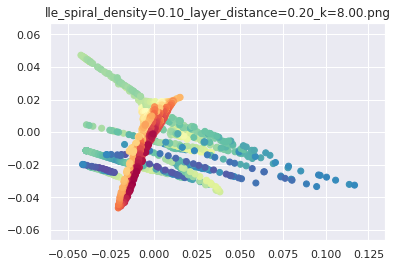

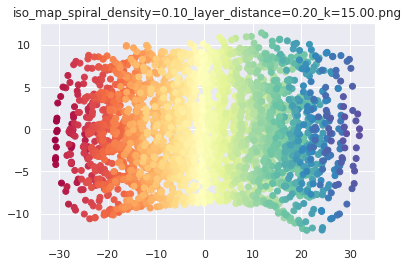

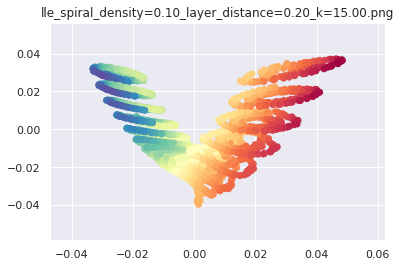

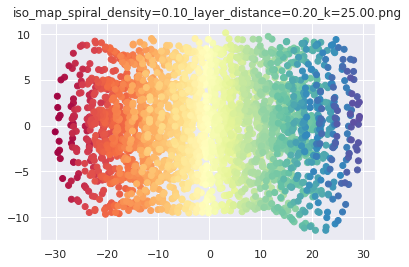

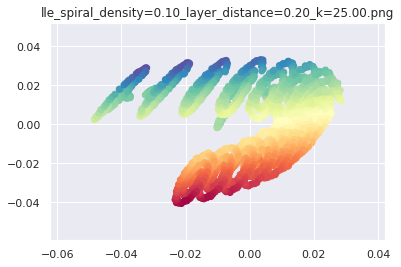

<Figure size 432x288 with 0 Axes>

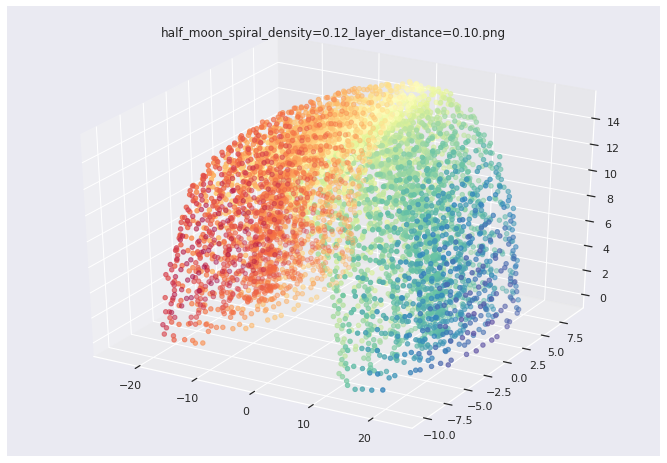

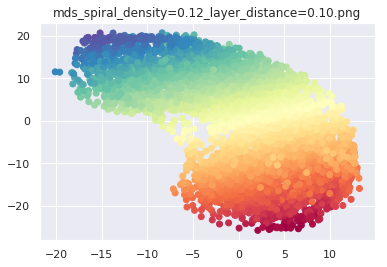

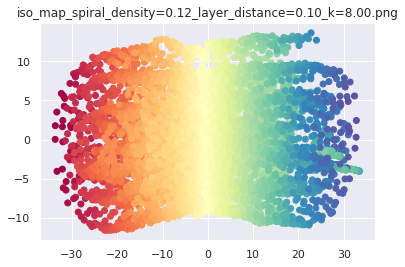

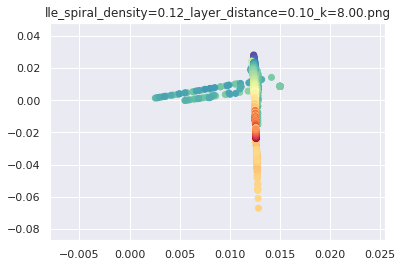

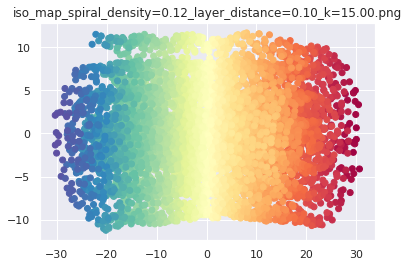

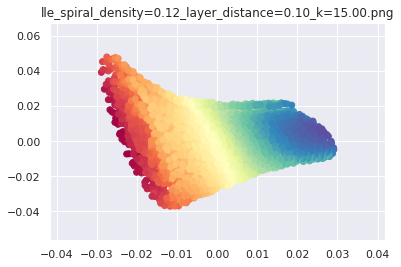

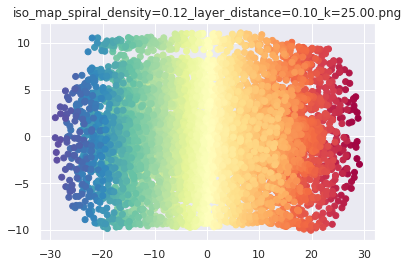

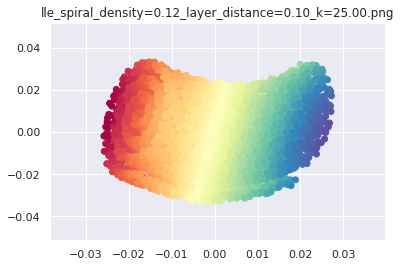

<Figure size 432x288 with 0 Axes>

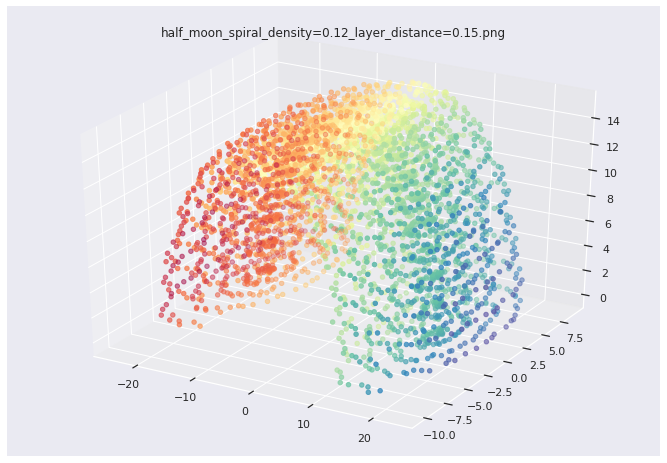

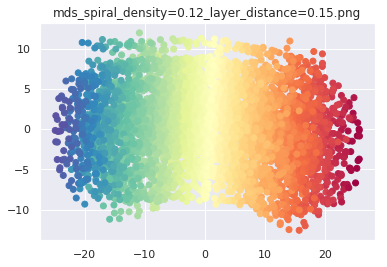

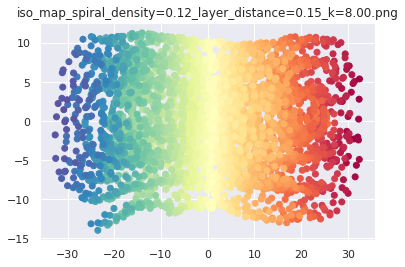

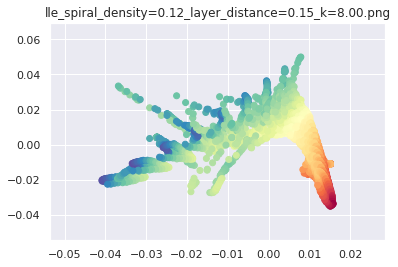

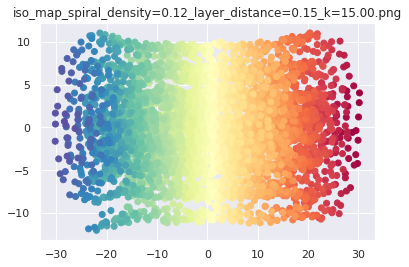

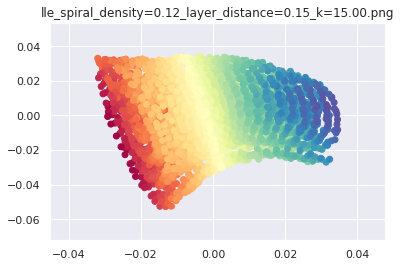

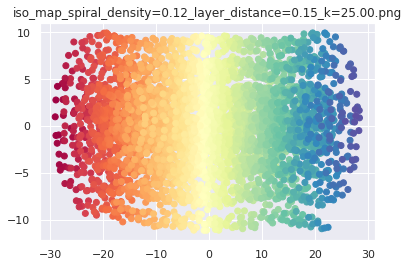

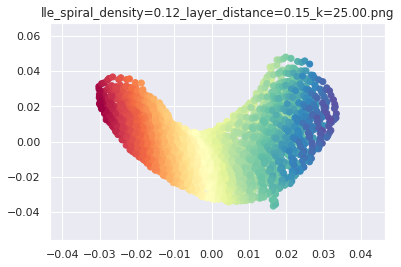

<Figure size 432x288 with 0 Axes>

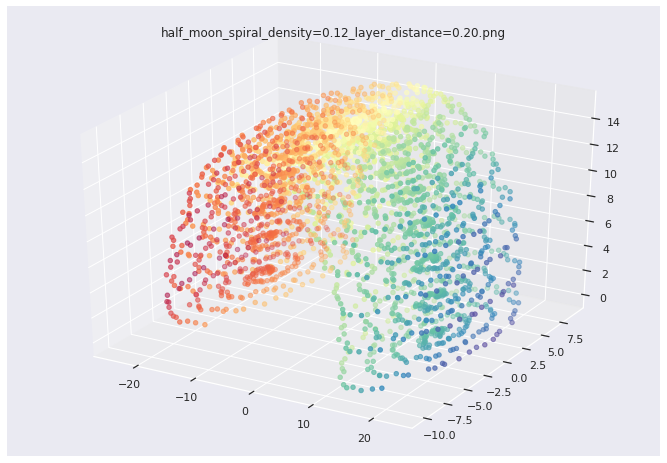

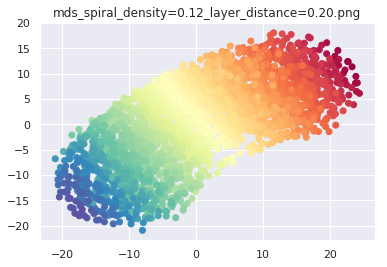

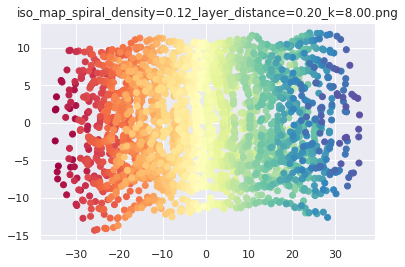

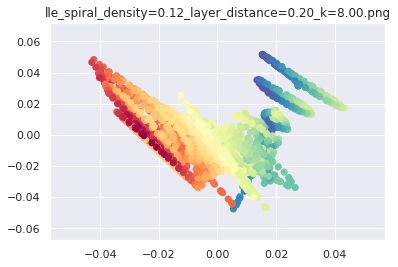

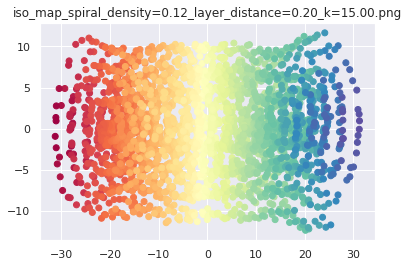

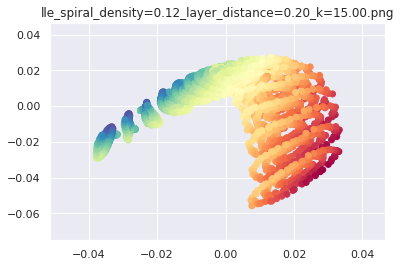

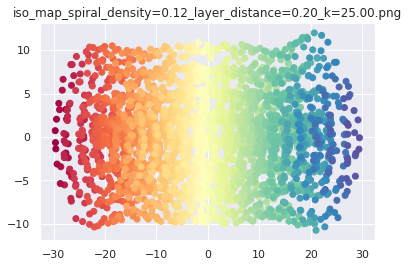

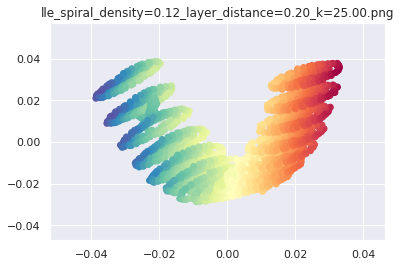

In [104]:
sns.set()

for density in [.05, .1, .12]:
    for layer_distance in [.1, .15, .2]:
        hm_spiral = half_moon_spiral(radius=15, resolution=layer_distance, spiral_density=density)
        plt.clf()
        fig = plt.figure()
        fig.set_size_inches(11.7, 8.27)
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(hm_spiral[0], hm_spiral[1], hm_spiral[2], c=hm_spiral[0], cmap=plt.cm.Spectral)

        pic_title = "half_moon_spiral_density={0:.2f}_layer_distance={1:.2f}.png".format(density, layer_distance)
        plt.title(pic_title)
        plt.savefig(pic_title)
        plt.show()
        colors = hm_spiral[0]

        matrix = np.column_stack((hm_spiral[0], hm_spiral[1], hm_spiral[2]))
        draw_mds(matrix, density, layer_distance, colors)
        for k in [8, 15, 25]:
            draw_iso_map(matrix, density, layer_distance, k, colors)
            draw_lle(matrix, density, layer_distance, k, colors)


In [89]:
def draw_isomap_images(directory, neighbours, title):
    samples = []
    images = []

    for fname in os.listdir(directory):
        fullname = os.path.join(directory, fname)
        img = mpimg.imread(fullname)
#         samples.append(  (img[::2, ::2] / 255.0))  
        samples.append((img).reshape(-1))
        images.append(img)

    df = pd.DataFrame(samples)

    iso = Isomap(n_neighbors=neighbours, n_components=2)
    iso.fit(df)

    manifold_2Da = iso.transform(df)
    manifold_2Da = pd.DataFrame(manifold_2Da)
    manifold_2D = pd.DataFrame(manifold_2Da.values, columns=['Component 1', 'Component 2'])

    fig = plt.figure()
    fig.set_size_inches(11.7, 8.27)
    
    ax = fig.add_subplot(111)
    ax.set_title(title)

    # Show 40 of the images ont the plot
    x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
    y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
    for i in range(len(manifold_2D)):
        x0 = manifold_2D.loc[i, 'Component 1'] - (x_size / 2.)
        y0 = manifold_2D.loc[i, 'Component 2'] - (y_size / 2.)
        x1 = manifold_2D.loc[i, 'Component 1'] + (x_size / 2.)
        y1 = manifold_2D.loc[i, 'Component 2'] + (y_size / 2.)
        img = images[i]
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray,
                  interpolation='nearest', extent=(x0, x1, y0, y1))

    # Show 2D components plot
    ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.', alpha=0.7)
    plt.show()


In [91]:
def draw_lle_images(directory, neighbours, title):
    samples = []
    images = []

    for fname in os.listdir(directory):
        fullname = os.path.join(directory, fname)
        img = mpimg.imread(fullname)
#         samples.append(  (img[::2, ::2] / 255.0))  
        samples.append((img).reshape(-1))
        images.append(img)

    df = pd.DataFrame(samples)

    lle = LocallyLinearEmbedding(n_neighbors=neighbours, n_components=2)
    lle.fit(df)

    manifold_2Da = lle.transform(df)
    manifold_2Da = pd.DataFrame(manifold_2Da)
    manifold_2D = pd.DataFrame(manifold_2Da.values, columns=['Component 1', 'Component 2'])

    fig = plt.figure()
    fig.set_size_inches(11.7, 8.27)
    
    ax = fig.add_subplot(111)
    ax.set_title(title)

    # Show 40 of the images ont the plot
    x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
    y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
    for i in range(len(manifold_2D)):
        x0 = manifold_2D.loc[i, 'Component 1'] - (x_size / 2.)
        y0 = manifold_2D.loc[i, 'Component 2'] - (y_size / 2.)
        x1 = manifold_2D.loc[i, 'Component 1'] + (x_size / 2.)
        y1 = manifold_2D.loc[i, 'Component 2'] + (y_size / 2.)
        img = images[i]
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray,
                  interpolation='nearest', extent=(x0, x1, y0, y1))

    # Show 2D components plot
    ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.', alpha=0.7)
    plt.show()


   0        1        2        3        4        5        6        7        \
0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
1      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
2      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
3      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
4      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   

   8        9        ...  2003950  2003951  2003952  2003953  2003954  \
0      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
1      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
2      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
3      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
4      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   

   2003955  2003956  2003957  2003958  2003959  
0      1.0      1.0      1.0      1.0      1.0  


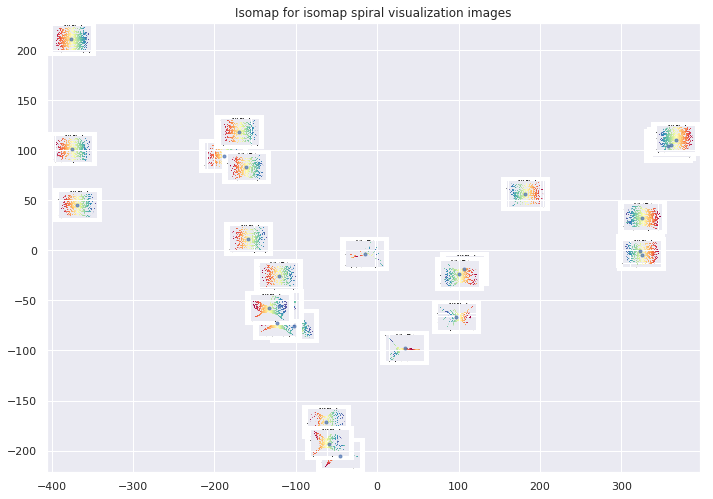

   0        1        2        3        4        5        6        7        \
0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
1      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
2      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
3      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
4      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   

   8        9        ...  2003950  2003951  2003952  2003953  2003954  \
0      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
1      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
2      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
3      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   
4      1.0      1.0  ...      1.0      1.0      1.0      1.0      1.0   

   2003955  2003956  2003957  2003958  2003959  
0      1.0      1.0      1.0      1.0      1.0  


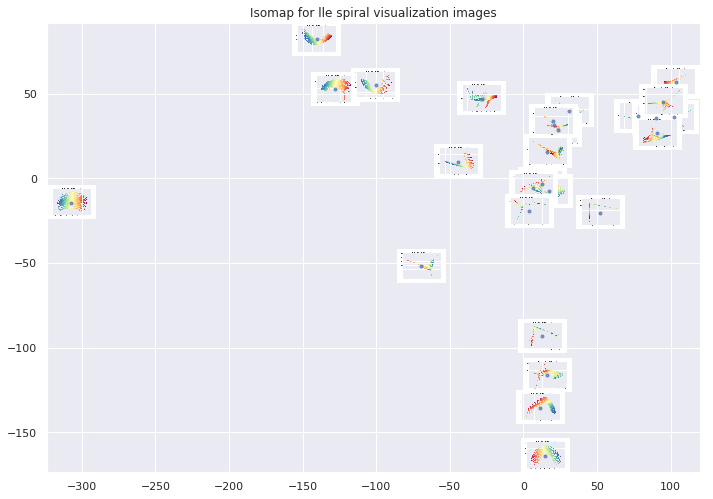

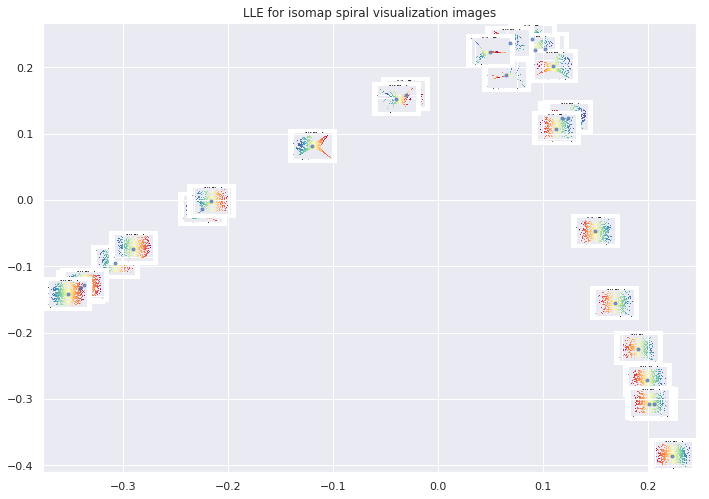

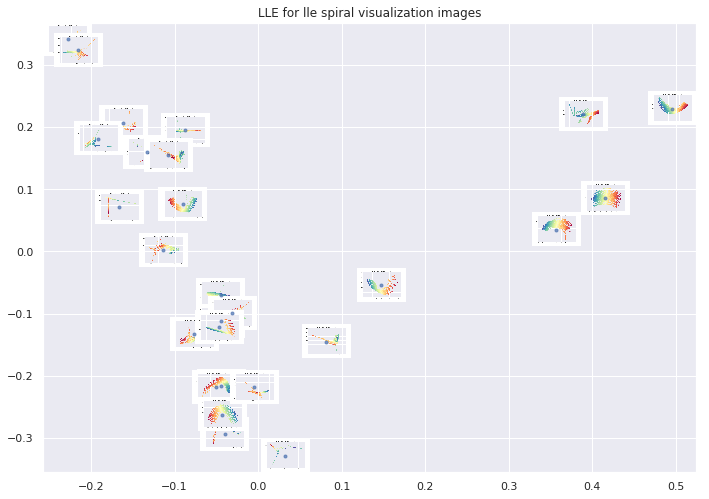

In [92]:
draw_isomap_images("results/half_moon/isomap/", 5, "Isomap for isomap spiral visualization images")
draw_isomap_images("results/half_moon/lle", 5, "Isomap for lle spiral visualization images")

draw_lle_images("results/half_moon/isomap/", 5, "LLE for isomap spiral visualization images")
draw_lle_images("results/half_moon/lle", 5, "LLE for lle spiral visualization images")

In [100]:
def draw_tsne(matrix, learning_rate, perplexity, colors):
    embedding = TSNE(n_components=2, verbose=1, perplexity=perplexity, learning_rate=learning_rate)    
    tsne = embedding.fit_transform(matrix)
    plt.clf()
    plt.scatter(tsne[:, 0], tsne[:, 1], c=colors, cmap=plt.cm.Spectral)
    pic_title = "t_sne_spiral_perplexity={0:.1f}_learning_rate={1:.1f}.png".format(perplexity, learning_rate)
    plt.title(pic_title)
    plt.savefig(pic_title)
    plt.show()


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 3200 samples in 0.001s...
[t-SNE] Computed neighbors for 3200 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3200
[t-SNE] Computed conditional probabilities for sample 2000 / 3200
[t-SNE] Computed conditional probabilities for sample 3000 / 3200
[t-SNE] Computed conditional probabilities for sample 3200 / 3200
[t-SNE] Mean sigma: 1.066753
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.464333
[t-SNE] KL divergence after 1000 iterations: 0.817413
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 3200 samples in 0.001s...
[t-SNE] Computed neighbors for 3200 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3200
[t-SNE] Computed conditional probabilities for sample 2000 / 3200
[t-SNE] Computed conditional probabilities for sample 3000 / 3200
[t-SNE] Computed conditional probabilities for sample 3200 / 3200
[t-SNE] Mean sigma: 1.066753


[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.479973
[t-SNE] KL divergence after 1000 iterations: 0.782049
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 3200 samples in 0.002s...
[t-SNE] Computed neighbors for 3200 samples in 0.122s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3200
[t-SNE] Computed conditional probabilities for sample 2000 / 3200
[t-SNE] Computed conditional probabilities for sample 3000 / 3200
[t-SNE] Computed conditional probabilities for sample 3200 / 3200
[t-SNE] Mean sigma: 1.717114
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.441833
[t-SNE] KL divergence after 1000 iterations: 0.777714
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 3200 samples in 0.001s...
[t-SNE] Computed neighbors for 3200 samples in 0.123s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3200
[t-SNE] Computed conditional probabilities for sample 2000 / 3200
[t-SNE] Computed conditiona

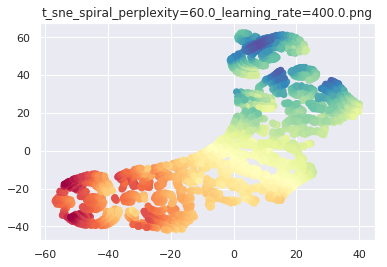

In [101]:
sns.set()

hm_spiral = half_moon_spiral(radius=15, resolution=layer_distance, spiral_density=density)
colors = hm_spiral[0]

matrix = np.column_stack((hm_spiral[0], hm_spiral[1], hm_spiral[2]))
for perplexity in [20, 40, 60]:
    for learning_rate in [50, 250, 400, 600]:
        draw_tsne(matrix, learning_rate, perplexity, colors)
        draw_tsne(matrix, learning_rate, perplexity, colors)


In [140]:
data = pd.read_csv("data/lotto.csv", parse_dates=['date'],) 
data.head()

amount_won       date    level  lottery_nr  winners_number  \
0   9793759.5 2019-12-03  szóstka        6229             1.0   
1      5005.1 2019-12-03   piątka        6229            63.0   
2       112.7 2019-12-03  czwórka        6229          3458.0   
3        24.0 2019-12-03   trójka        6229         62594.0   
4         0.0 2019-09-03  szóstka        6228             0.0   

    winning_numbers  
0  3,11,17,26,34,36  
1  3,11,17,26,34,36  
2  3,11,17,26,34,36  
3  3,11,17,26,34,36  
4   4,6,15,18,41,43

In [141]:
data["date"] = data["date"].dt.strftime('%d-%m-%Y')
data.head()

data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

data['year-month'] = data['year'].astype(str) + "-" + data['month'].astype(str)
data.head()

amount_won        date    level  lottery_nr  winners_number  \
0   9793759.5  03-12-2019  szóstka        6229             1.0   
1      5005.1  03-12-2019   piątka        6229            63.0   
2       112.7  03-12-2019  czwórka        6229          3458.0   
3        24.0  03-12-2019   trójka        6229         62594.0   
4         0.0  03-09-2019  szóstka        6228             0.0   

    winning_numbers  year  month year-month  
0  3,11,17,26,34,36  2019      3     2019-3  
1  3,11,17,26,34,36  2019      3     2019-3  
2  3,11,17,26,34,36  2019      3     2019-3  
3  3,11,17,26,34,36  2019      3     2019-3  
4   4,6,15,18,41,43  2019      3     2019-3

In [146]:
data_agg = data.groupby('year-month')['winners_number'].sum().reset_index()
data_agg = data_agg.replace(0.0,nan)
data_agg = data_agg.dropna()
data_agg.head()

year-month  winners_number
576     2005-1       2049104.0
577    2005-10       2183849.0
578    2005-11       2470026.0
579    2005-12       2388993.0
580     2005-2       2460476.0

In [156]:
data_agg_amount = data.groupby('year-month')['amount_won'].sum().reset_index()
data_agg_amount = data_agg_amount.replace(0.0,nan)
data_agg_amount = data_agg_amount.dropna()
data_agg_amount.head()

year-month  amount_won
576     2005-1   4882223.8
577    2005-10  12740536.9
578    2005-11  16287300.0
579    2005-12  19276642.8
580     2005-2  15797234.6

In [187]:
merged_df = pd.merge(data_agg,
                 data_agg_amount[['year-month', 'amount_won']],
                 on='year-month')
merged_df['date_index'] = range(1, len(merged_df) + 1)
merged_df = merged_df.drop('year-month', 1)

merged_df.head()

winners_number  amount_won  date_index
0       2049104.0   4882223.8           1
1       2183849.0  12740536.9           2
2       2470026.0  16287300.0           3
3       2388993.0  19276642.8           4
4       2460476.0  15797234.6           5

In [192]:
def draw_tsne_lotto(df, learning_rate, perplexity, colors):
    embedding = TSNE(n_components=2, verbose=1, perplexity=perplexity, learning_rate=learning_rate)    
    tsne = embedding.fit_transform(df)
    plt.clf()
    plt.scatter(tsne[:, 0], tsne[:, 1], c=colors, cmap=plt.cm.Spectral)
    pic_title = "t_sne_lotto_perplexity={0:.1f}_learning_rate={1:.1f}.png".format(perplexity, learning_rate)
    plt.title(pic_title)
    plt.savefig(pic_title)
    plt.show()

def draw_iso_map(df, k, colors):
    embedding = Isomap(n_components=2, n_neighbors=k)
    iso_map = embedding.fit_transform(df)
    plt.clf()
    plt.scatter(iso_map[:, 0], iso_map[:, 1], c=colors, cmap=plt.cm.Spectral)
    pic_title = "iso_map_lotto_k={0:.2f}.png".format(k)
    plt.title(pic_title)
    plt.savefig(pic_title)
    plt.show()


def draw_lle(df, k, colors):
    embedding = LocallyLinearEmbedding(n_neighbors=k, n_components=2)
    lle = embedding.fit_transform(df)
    plt.clf()
    plt.scatter(lle[:, 0], lle[:, 1], c=colors, cmap=plt.cm.Spectral)
    pic_title = "lle_lotto_k={0:.2f}.png".format(k)
    plt.title(pic_title)
    plt.savefig(pic_title)
    plt.show()

<Figure size 432x288 with 0 Axes>

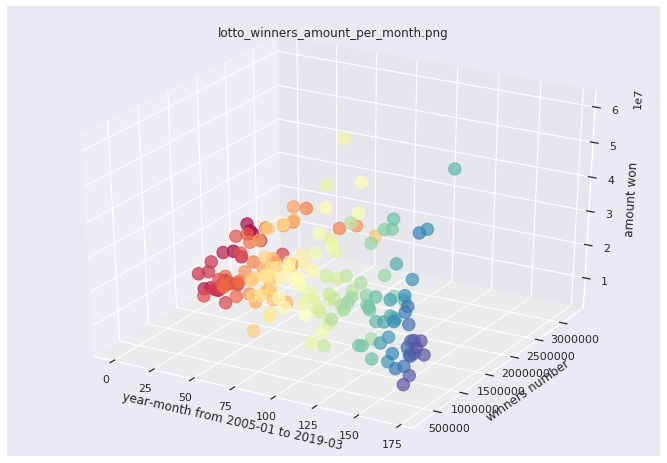

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 171 samples in 0.000s...
[t-SNE] Computed neighbors for 171 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 171 / 171
[t-SNE] Mean sigma: 53063.357753
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.688126
[t-SNE] KL divergence after 1000 iterations: 0.140680


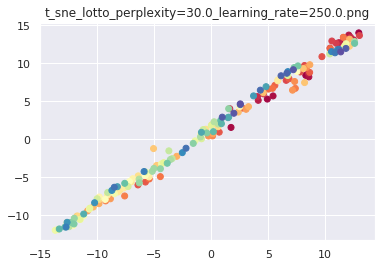

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 171 samples in 0.006s...
[t-SNE] Computed neighbors for 171 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 171 / 171
[t-SNE] Mean sigma: 53063.357753
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.879463
[t-SNE] KL divergence after 800 iterations: 0.570047


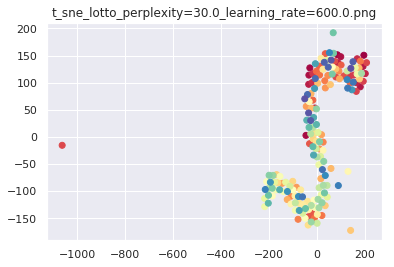

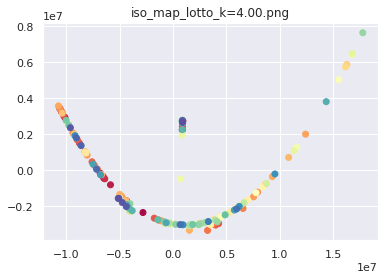

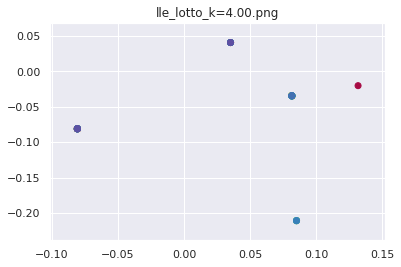

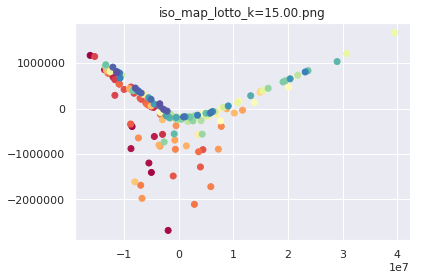

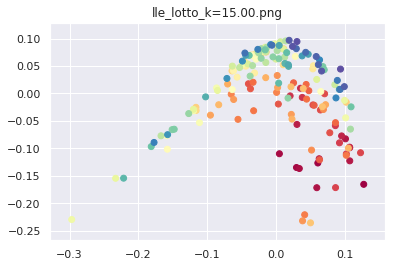

In [193]:
plt.clf()
fig = plt.figure()
fig.set_size_inches(11.7, 8.27)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(range(len(merged_df['date_index'])), merged_df['winners_number'], merged_df['amount_won'], c=merged_df['date_index'], cmap=plt.cm.Spectral, alpha=0.7, s=155)

pic_title = "lotto_winners_amount_per_month.png".format(density, layer_distance)
plt.title(pic_title)
plt.savefig(pic_title)
ax.set_xlabel("year-month from 2005-01 to 2019-03")
ax.set_ylabel("winners number");
ax.set_zlabel("amount won")
plt.show()
colors = merged_df['date_index']

for learning_rate in [250, 600]:
    draw_tsne_lotto(merged_df, learning_rate, 30, colors)
    
for k in [4, 15]:
    draw_iso_map(merged_df, k, colors)
    draw_lle(merged_df, k, colors)